In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import math
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
import numpy as np
import pickle

In [0]:
df = pd.read_csv("/content/drive/My Drive/DataColab/data_set.csv")

In [361]:
df = df[df.target != 0]
df = df[df.target <220]
df.head(100)

,x_resol,y_resol,w_values,h_values,target
0,640,480,85,85,153
1,640,480,89,89,157
2,640,480,86,86,153
3,640,480,86,86,156
4,640,480,81,81,155
...,...,...,...,...,...
95,640,480,137,137,99
96,640,480,134,134,96
97,640,480,137,137,101
98,640,480,136,136,96


In [362]:
df['x_ratio']= df['w_values']/df['x_resol']
df['y_ratio']= df['h_values']/df['y_resol']
df = df[['x_ratio','y_ratio','target']]
df

,x_ratio,y_ratio,target
0,0.132812,0.177083,153
1,0.139063,0.185417,157
2,0.134375,0.179167,153
3,0.134375,0.179167,156
4,0.126562,0.168750,155
...,...,...,...
2364,0.726562,0.968750,25
2365,0.726562,0.968750,26
2366,0.726562,0.968750,23
2367,0.662500,0.883333,23


In [363]:
print(df.shape)

(2342, 3)


In [0]:
x=df.drop(['target'],1)
y=df['target']

In [0]:
prediction_size=200

In [0]:
x_prediction=x[-prediction_size:]
y_prediction=y[-prediction_size:]
x=x[:-prediction_size+1]
y=y[:-prediction_size+1]

In [369]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,shuffle= True)
#model=LinearRegression()
model=svm.SVR()
model.fit(x_train,y_train)
with open('/content/drive/My Drive/DataColab/Final_estimator.pickle','wb') as f:
  pickle.dump(model,f)
accuracy=model.score(x_test,y_test)
print(accuracy)

0.9302707639003215


In [375]:
prediction_linear = model.predict(x_test)
scores_regr = metrics.mean_squared_error(y_test, prediction_linear)
print(scores_regr)

205.7287460471985


In [377]:
prediction_linear_val = model.predict(x_prediction)
scores_regr = metrics.mean_squared_error(y_prediction, prediction_linear_val)
print(scores_regr)

134.65584555817685


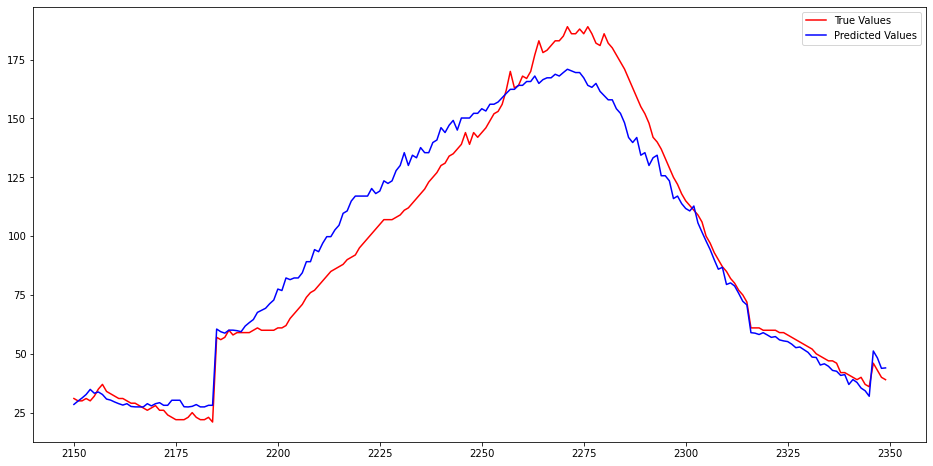

In [378]:
true_value = y_prediction.values
t = y_prediction.index
plt.figure(figsize=(16,8))
plt.plot(t, true_value, 'r') 
plt.plot(t, prediction_linear_val, 'b')
plt.legend(['True Values', 'Predicted Values'])
plt.show()